In [5]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
plt.rcParams['figure.figsize'] = (10,6)

#load the dataset
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [40]:
#We will predicting Purchased as y 0/1
#We will be choosing Age as feature X

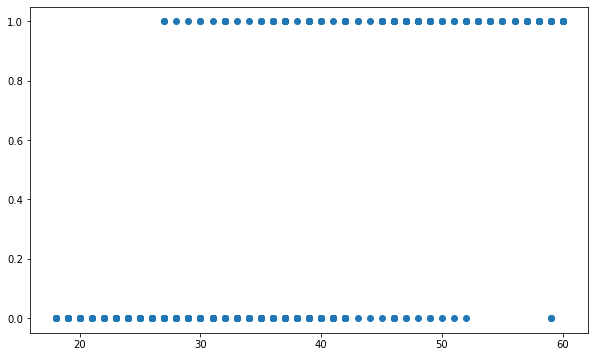

In [6]:
#Visualizing the dataset
plt.scatter(data['Age'], data['Purchased'])
plt.show()

#DEviding the data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Age'], data['Purchased'], test_size=0.20)

In [15]:
#Creating the logistic regression model

#Helper function to normalize data
def normalize(X):
    return X - X.mean()

#method to make prediction
def predict(X,b0,b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])

#Method to train the model
def logistic_regression(X,Y):
    X = normalize(X)
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 150
    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))
        D_b1 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred) * X)
            
        b0 = b0 - (L * D_b0)
        b1 = b1 - (L * D_b1)
    return b0, b1

Accuracy = 0.5625


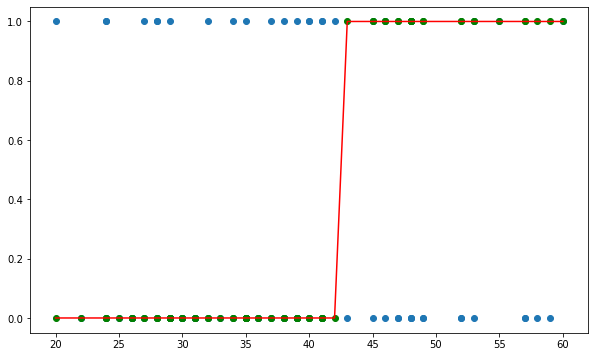

In [16]:
#train the data
b0, b1 = logistic_regression(X_train, y_train)

X_test = X_test.sort_values()
X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]


plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, color='green')
plt.plot(X_test, y_pred, c="red") # Only if values are sorted

#Accuracy
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy+= 1
print(f"Accuracy = {accuracy / len(y_pred)}")

C:\Users\Udit\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


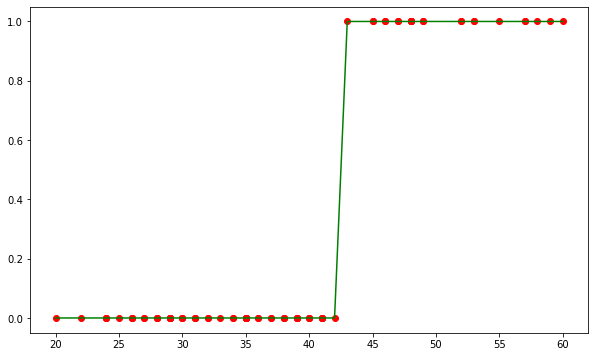

Accuracy = 0.5625


In [21]:
#making prediction using sklearn
from sklearn.linear_model import LogisticRegression

#create instance and fit the model
lr_model = LogisticRegression()
lr_model.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

#Making the prediction model
y_pred_sk = lr_model.predict(X_test.values.reshape(-1,1))

#Plotting the graph
plt.clf()
plt.scatter(X_test, y_pred_sk, c="red")
plt.plot(X_test, y_pred_sk, c="green")
plt.show()

#accuracy
print(f"Accuracy = {lr_model.score(X_test.values.reshape(-1,1), y_test.values.reshape(-1,1))}")